<center><div style="font-size:32px;display:inline-block;line-height:1.1;font-weight:bold;margin:0 0 15px" class="aula-title">Capítulo 8: Saída de dados do IPython</div></center>

# Atividade 1: Saída Markdown

### Exemplo 1: Saídas do IPython

In [1]:
# Importando o IPython.display
import IPython.display as ipy

**Audio:**

In [2]:
ipy.Audio(url="http://www.w3schools.com/html/horse.ogg")

**Imagem:**

In [3]:
ipy.Image(url='http://www.google.fr/images/srpr/logo3w.png')

**Youtube:**

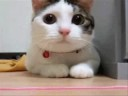

In [4]:
# Para colocar um vídeo basta colocar o código do vídeo
ipy.YouTubeVideo('4Ifma_3ZB24')

**Código HTML (Linguagem da Web):**

In [5]:
ipy.HTML('<p style="color:blue">Um texto azul em HTML.</p>')

**Um site (IFrame):**

In [6]:
# Podemos colocar um IFrame, que de forma simplificada é uma página web incorporada ao Notebook
ipy.IFrame(src="https://cursopythonufac.github.io/", width=400, height=300)

### Exemplo 2: Função Markdown

**Exemplo simples:**

In [7]:
TextoEmMarkdown="Este texto está em _itálico_ e este em **negrito**."

ipy.Markdown(TextoEmMarkdown)

Este texto está em _itálico_ e este em **negrito**.

**Corrigindo com a função `display()`:**

In [8]:
TextoEmMarkdown="Este texto está em _itálico_ e este em **negrito**."

display(ipy.Markdown(TextoEmMarkdown))

Este texto está em _itálico_ e este em **negrito**.

**Criando a função `md()`**:

In [9]:
## Função md

def md(Texto):
    display(ipy.Markdown(Texto))

In [10]:
# Código
md(TextoEmMarkdown)

Este texto está em _itálico_ e este em **negrito**.

### Exemplo 3: Markdown com Multi-linha

In [11]:
md("""
**Lista de compras:**

- Maça
- Banana
- Leite
- Queijo
""")


**Lista de compras:**

- Maça
- Banana
- Leite
- Queijo


### Exemplo 4: Markdown e interação com o usuário

Vamos mostrar um pequeno exemplo em que é possível criar uma interação com o usuário:

**Carregando as bibliotecas:**

In [12]:
# Importando os módulos de widgets
import ipywidgets as widget
import ipywidgets as widgets
from ipywidgets import interact

**Método `.splitlines()`:**

Testando a interação:

In [13]:
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Separe os itens por quebra linha.')
)
def Lista_Saída(Lista):
    if Lista: #Verifica se a string não é vazia 
        ListaVec=Lista.splitlines() # Quebrando a string por linha (Lista.split('\n'))
        display(ListaVec)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Separe os itens por quebra linha.…

Testando a saída:

**Método `.replace()` combinado com o método `isalpha()`:**

In [14]:
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Separe os itens por quebra linha.')
)
def Lista_Saída(Lista):
    if Lista: #Verifica se a string não é vazia
        ListaVec=Lista.splitlines() # Quebrando a string em uma lista

        saídaLista="Saída da lista de compras:\n" # Criando um acomulador:
        for Item in ListaVec:
            # Verifica se o item que o usuário digitou é alfabético (Sem espaços)
            if Item.replace(' ','').isalpha():
                saídaLista+='- {}\n'.format(Item)  
        md(saídaLista)
"""
Arroz Tio João
Feijão Carioca
123 Não Alfabético
Não Alfa 123
Macarrão
""";

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Separe os itens por quebra linha.…

**Método `.split()`**

Vamos utilizar o método `.split()` para adicionar suporter ao preço:

Testando a saída:

In [15]:
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista:
        ListaVec=Lista.splitlines()
        for Item in ListaVec:
            #Utilizando o método split quebramos cada linha em duas partes
            Item = Item.split(' - ') 
            display(Item)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

Adicionando a saída:

In [16]:
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista: #Verifica se a string não é vazia
        ListaVec=Lista.splitlines() # Quebrando a string em uma lista
        saídaLista="Saída da lista de compras:\n"
        for Item in ListaVec:
            Item = Item.split(' - ')
            #display(Item)
            if len(Item)==2:
                if Item[0].replace(' ','').isalpha():
                    saídaLista+='- {} - R\${:.2f}\n'.format(Item[0],float(Item[1]))  
        md(saídaLista)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

**Praticando `try` e `except`:**

Para corrigir o erro vamos criar uma função.

In [17]:
# Criando uma função que verifica se o número é float:
def isfloat(value):
    try: # Tente executar 'float(value)'
        float(value)
        return True #Caso a execução seja bem sucedida retorne Verdadeiro
    except ValueError: # Caso a operação não for bem sucedida retorne falso
        return False

In [18]:
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista: #Verifica se a string não é vazia
        ListaVec=Lista.splitlines() # Quebrando a string em uma lista
        saídaLista="Saída da lista de compras:\n"
        for Item in ListaVec:
            Item = Item.split(' - ')

            if len(Item)==2:
                if Item[0].replace(' ','').isalpha() and isfloat(Item[1]): # Verifica se o item que o usuário digitou é alfabético
                    saídaLista+='- {} - R\$ {:.2f}\n'.format(Item[0],float(Item[1]))  
        md(saídaLista)
        
"""
Arroz Tio João - 2
Carne - 4.50
Peixe - 1.55
""";

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

**Adicionando suporte ao português:**

Substituindo `,` por `.`

In [19]:
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista: #Verifica se a string não é vazia
        ListaVec=Lista.splitlines() # Quebrando a string em uma lista
        saídaLista="Saída da lista de compras:\n"
        for Item in ListaVec:
            Item = Item.split(' - ')
            
            if len(Item)==2:
                Item[1] = Item[1] #Item[1] é a variável preço
                Preço = Item[1].replace(",",'.')
                
                if Item[0].replace(' ','').isalpha() and isfloat(Preço): # Verifica se o item que o usuário digitou é alfabético
                    saídaLista+='- {} - R\$ {:.2f}\n'.format(Item[0],float(Preço))  
        md(saídaLista)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

Colocando o preço em português:

In [20]:
#Definindo a função que converte um float em um preço
def conv_Preço(Preço):
    return 'R\$ {:.2f}'.format(float(Preço)).replace('.',',')

In [21]:
# Substituindo a função no programa
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista: #Verifica se a string não é vazia
        ListaVec=Lista.splitlines() # Quebrando a string em uma lista
        saídaLista="Saída da lista de compras:\n"
        for Item in ListaVec:
            Item = Item.split(' - ')
            
            if len(Item)==2:
                Preço = Item[1].replace(",",'.')
                
                if Item[0].replace(' ','').isalpha() and isfloat(Preço): # Verifica se o item que o usuário digitou é alfabético
                    saídaLista+='- {} - {}\n'.format(Item[0],conv_Preço(Preço))  
        md(saídaLista)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

**Método `.strip()`:**

Permitindo que o item seja mostrado mesmo sem o preço:

In [22]:
# Substituindo a função no programa
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista:
        ListaVec=Lista.splitlines()
        saídaLista="Saída da lista de compras:\n"
        for Item in ListaVec:
            Item = Item.split('-')
            
            #Removendo espaço das bordas
            Item[0]=Item[0].strip()
            
            #Verificando se o nome do item é válido
            if Item[0].replace(' ','').isalpha():
                saídaLista+='- {} '.format(Item[0])
            
                #Verificando se o preço foi adicionado
                if len(Item)==2:
                    Preço = Item[1].strip() #Removendo espaço das bordas
                    Preço = Preço.replace(",",'.') #Convertendo para inglês
                    if isfloat(Preço):
                        saídaLista+=' - ' + conv_Preço(Preço)
                saídaLista+='\n'
        md(saídaLista)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

#### Tarefa 1: Lista de compras

Adicione ao Exemplo 1:

- Suporte a quantidade de itens
- Cálculo do gasto total com as compras.

A entrada de um item na lista do usuário deve ser da seguinte forma:

> `[Item] - [Preço] - [Quantidade]`

E ainda:
- Se o usuário não digitar o preço o preço deve ser considerado nulo.
- Se o usuário não digitar a quantidade a quantidade deverá ser consideradada como 1.

> **Dica:** Use a notação `[i.strip() for i in Item]` para simplificar seu código.

**Solução:**

In [23]:
# Substituindo a função no programa
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Item - Preço - Qtd.')
)
def Lista_Saída(Lista):
    if Lista:
        ListaVec=Lista.splitlines()
        saídaLista="Saída da lista de compras:\n"
        Total = 0
        for Item in ListaVec:
            Item = Item.split('-')
            
            Item = [i.strip() for i in Item]
           
            #Verificando se o nome do item é válido
            if Item[0].replace(' ','').isalpha():
                saídaLista+='- {} '.format(Item[0])
                           
                Preço = 0 # Supõe que o preço é nulo
                if len(Item)>=2:
                    Item[1] = Item[1].replace(",",'.') #Convertendo para inglês
                    if isfloat(Item[1]):
                        Preço = float(Item[1])
                
                saídaLista+=' - ' + conv_Preço(Preço)
                
                Qtd = 1 # Supõe que a quantidade é 1
                if len(Item)==3:                   
                    if Item[2].isdigit():
                        Qtd = int(Item[2].replace(' ',''))
                
                saídaLista+=' - ' + str(Qtd)
                
                #Incrementa o valor no total
                Total += Preço*Qtd
                
                #Finaliza a lista
                saídaLista+='\n'
        
        md(saídaLista)
        md('**Total:** {}'.format(conv_Preço(Total)))
"""
Uso para testar:
Feijão - 5,99 - 5
Leite - 3,00 - 12
Creme Scala - 6,50
Sabonete - 2,00 - 3
Café - 5,00 - 4
""";





Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Item - Preço - Qtd.'), Output()),…

# Atividade 2: Tabelas

### Exemplo 5: Tabelas no Markdown

Criar Tabelas no Markdown é muito simples. Veja o exemplo abaixo:

|A esquerda (Padrão)|Centralizado|A direita|A esquerda|
|-|:-:|-:|:-|
|Valor 1|Valor 2|Valor 3|Valor 4|


Ou ainda:

|A esquerda (Padrão)|Centralizado|A direita|A esquerda|
|-|:-:|-:|:-|
|Valor 1|Valor 2|Valor 3|Valor 4|

Você pode usar o site abaixo para criar tabelas facilmente:
> [https://www.tablesgenerator.com/markdown_tables](https://www.tablesgenerator.com/markdown_tables)

**Refazendo o Exemplo 4 na forma de Tabelas:**

In [24]:
# Substituindo a função no programa
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Escreva Item - Preço.')
)
def Lista_Saída(Lista):
    if Lista:
        ListaVec=Lista.splitlines()
        saídaLista="|Item|Preço|\n|:-:|:-:|\n" #Cria o início da Tabela
        for Item in ListaVec:
            Item = Item.split(' - ')
            
            #Tratando a entrada
            Item[0]=Item[0].replace('-','')
            
            #Verificando se o nome do item é válido
            if Item[0].replace(' ','').isalpha():
                #Verificando se o preço foi adicionado
                Preço = 0
                if len(Item)>=2:
                    #Tratando a entrada
                    Item[1] = Item[1].replace(' ','').replace(",",'.')
                    
                    if isfloat(Item[1]):
                        Preço = float(Item[1])
                
                saídaLista+='|{}|{}|\n'.format(Item[0],conv_Preço(Preço))
        md(saídaLista)

Escreva a sua lista de compras abaixo:

interactive(children=(Textarea(value='', description='Lista: ', placeholder='Escreva Item - Preço.'), Output()…

# Atividade 3: Para casa

## Exercício 1: Lista de compras modificada

Modifique a Tarefa 1 mostrando o preço do produto e a quantidade em uma sub-lista dentro do item.

- O preço só deve ser mostrado na sub-lista se e somente se o usuário especificar
- O programa deve entender os preços no seguintes formatos:
    - 4.50
    - 4,50
    - R\$ 4,50
    - R\$ 4.50
- A quantidade deve ser mostrada se e somente se o usuário espcificar.

Veja um exemplo:

A string:

```
Arroz - 4,50 - 2
Carne - R$ 12,40 - 4
Lentilha - - 1
Ração Whiskas - 16.30 - 2
Leite - 4,50
```

Resulta em:

- Arroz
    - Preço: R\$ 4,50
    - Qtd: 2
- Carne
    - Preço: R\$ 12,40
    - Qtd: 4
- Lentilha
    - Qtd: 1
- Ração para Whiskas
    - Preço: R\$ 16,30
    - Qtd: 2
- Leite
    - Preço: R\$ 4,50
    
**Total:** R$ 95,70

**Solução:**

In [ ]:
# Substituindo a função no programa
md("Escreva a sua lista de compras abaixo:")
@interact(Lista=widget.Textarea(
    description="Lista: ",             
    placeholder='Item - Preço - Qtd.')
)
def Lista_Saída(Lista):
    if Lista:
        ListaVec=Lista.splitlines()
        saídaLista="Saída da lista de compras:\n"
        Total = 0
        for Item in ListaVec:
            Item = Item.split('-')
            
            Item = [i.strip() for i in Item]
           
            #Verificando se o nome do item é válido
            if Item[0].replace(' ','').isalpha():
                saídaLista+='- {}\n'.format(Item[0])
                           
                Preço = 0 # Supõe que o preço é nulo
                if len(Item)>=2:
                    Item[1] = Item[1].replace(",",'.').replace('R$','').replace(' ','')
                    if isfloat(Item[1]):
                        Preço = float(Item[1])
                        saídaLista+='    - Preço: ' + conv_Preço(Preço) + '\n'
                
                Qtd = 1 # Supõe que a quantidade é 1
                if len(Item)==3:                   
                    if Item[2].isdigit():
                        Qtd = int(Item[2].replace(' ',''))
                        saídaLista+='     - Qtd: ' + str(Qtd) + '\n'
                
                #Incrementa o valor no total
                Total += Preço*Qtd
        
        md(saídaLista)
        md('**Total:** {}'.format(conv_Preço(Total)))

### Exercício 2: Tabela em Markdown

Crie a seguinte Tabela em Markdown:

<table>
  <thead>
    <tr>
      <th style="text-align: right">Nome</th>
      <th style="text-align: left">Sexo</th>
      <th style="text-align: right">Idade</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: right">André</td>
      <td style="text-align: left">Masculino</td>
      <td style="text-align: right">45</td>
    </tr>
    <tr>
      <td style="text-align: right">Mariana</td>
      <td style="text-align: left">Feminino</td>
      <td style="text-align: right">32</td>
    </tr>
    <tr>
      <td style="text-align: right">João</td>
      <td style="text-align: left">Masculino</td>
      <td style="text-align: right">37</td>
    </tr>
    <tr>
      <td style="text-align: right">Pedro</td>
      <td style="text-align: left">Masculino</td>
      <td style="text-align: right">65</td>
    </tr>
    <tr>
      <td style="text-align: right">José</td>
      <td style="text-align: left">Masculino</td>
      <td style="text-align: right">93</td>
    </tr>
    <tr>
      <td style="text-align: right">Bianca</td>
      <td style="text-align: left">Feminino</td>
      <td style="text-align: right">40</td>
    </tr>
    <tr>
      <td style="text-align: right">Carlos</td>
      <td style="text-align: left">Feminino</td>
      <td style="text-align: right">44</td>
    </tr>
  </tbody>
</table>

**Solução:**